In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from my_style import set_journal_style

set_journal_style()

In [2]:
photosynthesis = pd.read_csv('photosynthesis.csv')
# 拟合回归模型
model1 = ols("Y~X",data=photosynthesis).fit()
model1.summary()

e:\Python\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     329.1
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           8.76e-08
Time:                        23:04:11   Log-Likelihood:                -49.118
No. Observations:                  10   AIC:                             102.2
Df Residuals:                       8   BIC:                             102.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    190.9559     19.821      9.634      0.000     145.248     236.664
X              0.0949      0.005     18.141      0.000       0.083       0.107
==============================================================================
Omnibus:                        6.495   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                2.431
Skew:                          -1.120   Prob(JB):                        0.297
Kurtosis:                       3.902   Cond. No.                     6.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

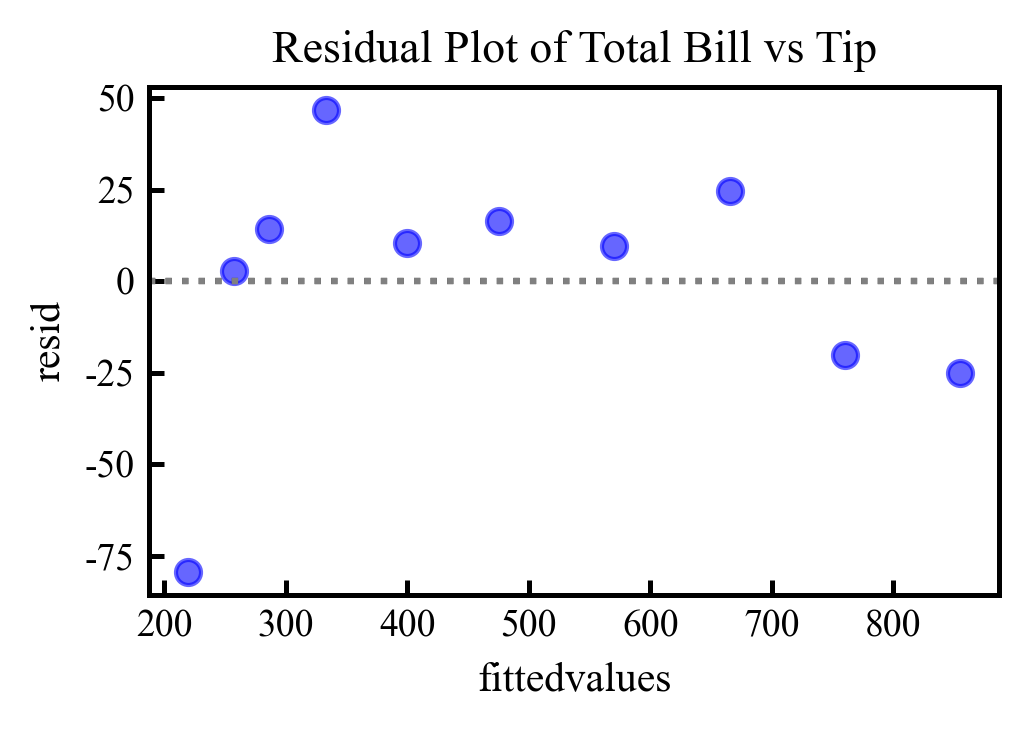

In [3]:
photosynthesis['fittedvalues'] = model1.fittedvalues
photosynthesis['resid'] = model1.resid

sns.residplot(x='fittedvalues', y='resid', data=photosynthesis[['fittedvalues','resid']], 
              scatter_kws={"color": "blue", "alpha": 0.6},
              line_kws={"color": "red", "linestyle": "--"})
plt.axhline(y=0, color="gray", linestyle=":")  # 添加y=0参考线
plt.title("Residual Plot of Total Bill vs Tip")
plt.show()

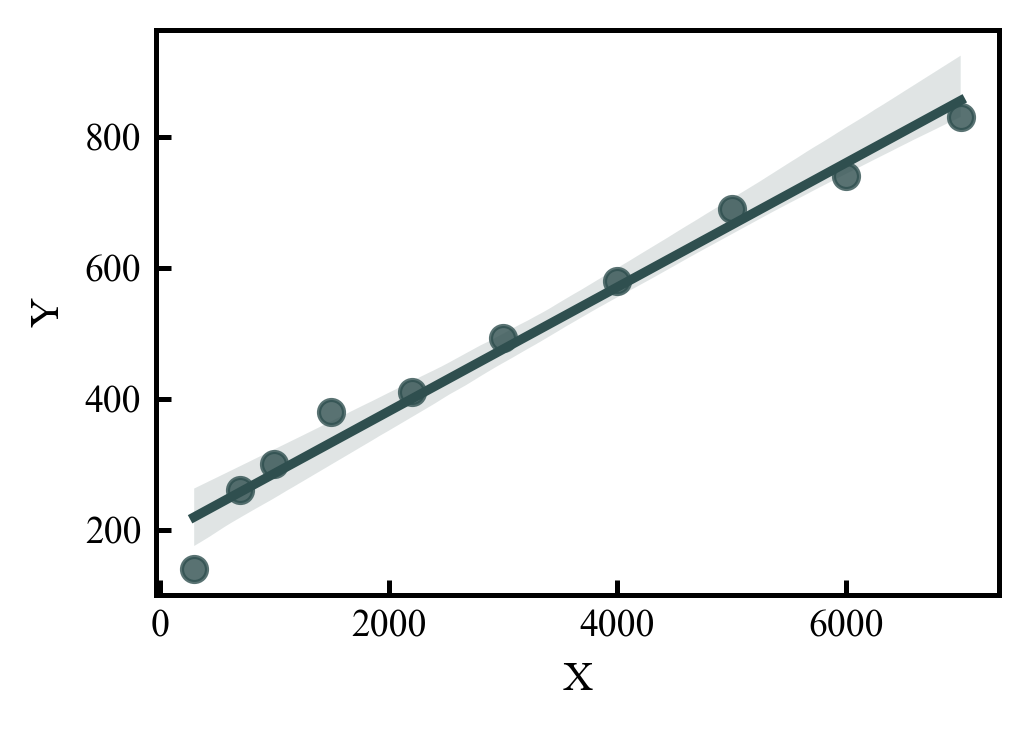

In [4]:
# 绘制回归
sns.regplot(x='X',
            y='Y',
            data=photosynthesis[['X','Y']])

plt.show()